In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
#import csv
import pandas as pd
pd.set_option('display.max_rows',500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import mca
import tqdm
#

from tensorflow.keras.models import Model
#
from tensorflow.keras.layers import Dense, Input, Activation
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, cluster
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
#
#
from keras.models import Sequential  # Model type to be used

#from tensorflow.keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.layers import Dense, Input, Activation, Dropout, LeakyReLU
leaky_relu = LeakyReLU(alpha=0.01)
from tensorflow.keras.utils import plot_model
#
from tensorflow.keras.optimizers import Adam
#
from tensorflow.keras import callbacks
#
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
print(tf.__version__)

import datetime

2022-11-26 17:37:53.874986: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-26 17:37:54.034340: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-26 17:37:54.034364: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-26 17:37:54.690799: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

2.11.0


In [2]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

#Data importing, cleaning and processing

In [3]:
df = pd.read_csv('spotify_songs.csv') #embeding artist:name:lyrics
df

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,7zXzWCVuz7whIuYZyEAlxt,Rising Like The Sun - Radio Mix,Qulinez,"Caught up in such a head rush, wide-eyed latel...",0,1l4aoukbPgi5u2OaE2R4Zj,Rising Like The Sun,2014-03-24,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,...,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,en
18450,7zycSpvjDcqh6YT1FEl2kY,Anaconda,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon...",49,5qs8T6ZHSrnllnOuUk6muC,The Pinkprint (Deluxe Edition),2014-12-15,10er Playlist,1kEczIkZH8IgaWT2BiApxZ,...,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,en
18451,7zye9v6B785eFWEFYs13C2,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",40,1xdgLmTFMSyJyI5DJOOX7T,2+2+1 = (Digitally Remastered),2013-07-09,Sexy Soul 2020,5EMARioe9z9eKOeWIAC2JW,...,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,en
18452,7zyLObYw4QUKQDyZOb4J0Y,I'll Do 4 U (Re-Recorded / Remastered),Father MC,(Would you do for me) Sweetheart (Would you do...,36,14HYMxFhpgDIr9cci1u0kt,I'll Do 4 U (Re-Recorded / Remastered),2010-10-01,New Jack Swing/ R&B Hits: 1987 - 2002,4sji14lrB5bgcr51lPALYH,...,-4.920,0,0.0633,0.14300,0.000000,0.0720,0.810,109.536,223890,en


In [4]:
# Let's clean the data by dropping some columns
dfnum   = df
dfnum   = dfnum.drop(['playlist_subgenre','track_id','track_name', 'track_artist','lyrics','track_album_id',	'track_album_name','playlist_name',	'playlist_id'], axis=1)
#Now, let's convert date of release to days since realise
dfnum['track_album_release_date'] = pd.to_datetime(dfnum['track_album_release_date'])    
dfnum['days_since_release'] = (dfnum['track_album_release_date'] - dfnum['track_album_release_date'].min())  / np.timedelta64(1,'D')
dfnum   = dfnum.drop('track_album_release_date',axis=1)
dfnum

,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language,days_since_release
0,41,rock,0.682,0.401,2,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440,tl,16071.0
1,28,rock,0.303,0.880,9,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,en,22239.0
2,0,r&b,0.845,0.652,6,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,en,17532.0
3,41,r&b,0.425,0.378,5,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,en,20390.0
4,65,pop,0.760,0.887,9,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,en,22909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,0,edm,0.479,0.800,10,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,en,20901.0
18450,49,pop,0.963,0.603,2,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,en,21167.0
18451,40,r&b,0.458,0.540,5,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,en,20643.0
18452,36,r&b,0.832,0.666,1,-4.920,0,0.0633,0.14300,0.000000,0.0720,0.810,109.536,223890,en,19631.0


In [5]:
dfnum.dtypes

track_popularity        int64
playlist_genre         object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_ms             int64
language               object
days_since_release    float64
dtype: object

Some columns provide qualitative information that would be useful for the predictor. Take, for example, the song's genre. I want to assing a different integer to each unique value of that column ( rock=0, pop=1, etc.) so then I will be able to use it as a numpy array.

In [6]:
#numerification of playlist_genre with one-hot encoding
y = pd.get_dummies(dfnum.playlist_genre, prefix='genre')
y

,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
18449,1,0,0,0,0,0
18450,0,0,1,0,0,0
18451,0,0,0,1,0,0
18452,0,0,0,1,0,0


In [7]:
#numerification of language
z = pd.get_dummies(dfnum.language, prefix='language')
dfqual  =pd.concat([y,z],axis=1)
pca = PCA(n_components=6)
dfqual = pca.fit_transform(dfqual)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
dfqual = pd.DataFrame(data = dfqual, 
                  columns = ['qual0', 'qual1', 'qual2', 'qual3', 'qual4', 'qual5'])

[0.23623753 0.18732462 0.16783144 0.15981959 0.10957926 0.06521964]
0.9260120863101031


In [8]:
dfnum  = dfnum.drop(['playlist_genre','language'],axis=1)
dfnum  =pd.concat([dfnum,dfqual],axis=1)
dfnum  = dfnum.astype(float)
dfnum   = NormalizeData(dfnum) #scaling
dfnum

/home/user/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/user/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,days_since_release,qual0,qual1,qual2,qual3,qual4,qual5
0,0.41,0.662692,0.390827,0.181818,0.681000,1.0,0.001340,0.281249,0.011854,0.080414,0.571136,0.338981,0.418893,0.697950,0.387869,5.325298e-02,9.561615e-01,0.300293,0.097080,0.057691
1,0.28,0.232254,0.877962,0.818182,0.830868,1.0,0.024341,0.011793,0.010071,0.342212,0.407663,0.554509,0.703040,0.965821,0.032771,3.573442e-14,9.137683e-01,0.383860,0.143633,0.440446
2,0.00,0.847814,0.646090,0.545455,0.753108,0.0,0.216168,0.004353,0.007325,0.486135,0.655900,0.422702,0.474513,0.761400,0.060372,1.403968e-01,0.000000e+00,0.203910,0.123639,0.443461
3,0.41,0.370812,0.367436,0.454545,0.800495,0.0,0.013064,0.694556,0.000000,0.057812,0.408672,0.460508,0.434589,0.885521,0.060372,1.403968e-01,4.454553e-14,0.203910,0.123639,0.443461
4,0.65,0.751278,0.885081,0.818182,0.908094,1.0,0.020657,0.037297,0.000000,0.130382,0.242172,0.525080,0.331882,0.994919,0.000000,8.927848e-01,5.409271e-01,0.445944,0.179673,0.464863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,0.00,0.432141,0.796603,0.909091,0.801648,0.0,0.073024,0.005593,0.000000,0.330049,0.212908,0.513742,0.363772,0.907713,0.146500,2.974760e-01,4.474913e-01,0.452203,1.000000,0.450298
18450,0.49,0.981829,0.596258,0.181818,0.789105,1.0,0.175971,0.067841,0.000006,0.207411,0.652872,0.524922,0.469930,0.919265,0.000000,8.927848e-01,5.409271e-01,0.445944,0.179673,0.464863
18451,0.40,0.408291,0.532188,0.454545,0.782552,0.0,0.005136,0.720766,0.000434,0.107070,0.662963,0.594033,0.327858,0.896508,0.060372,1.403968e-01,5.268508e-14,0.203910,0.123639,0.443461
18452,0.36,0.833049,0.660327,0.090909,0.825778,0.0,0.045668,0.144152,0.000000,0.063488,0.817354,0.409319,0.395123,0.852558,0.060372,1.403968e-01,5.268508e-14,0.203910,0.123639,0.443461


In [9]:
dfump = dfnum[dfnum.track_popularity <= 0.05]
dfnum = dfnum[dfnum.track_popularity > 0.05]
dfnum

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,days_since_release,qual0,qual1,qual2,qual3,qual4,qual5
0,0.41,0.662692,0.390827,0.181818,0.681000,1.0,0.001340,0.281249,0.011854,0.080414,0.571136,0.338981,0.418893,0.697950,0.387869,5.325298e-02,9.561615e-01,0.300293,0.097080,0.057691
1,0.28,0.232254,0.877962,0.818182,0.830868,1.0,0.024341,0.011793,0.010071,0.342212,0.407663,0.554509,0.703040,0.965821,0.032771,3.573442e-14,9.137683e-01,0.383860,0.143633,0.440446
3,0.41,0.370812,0.367436,0.454545,0.800495,0.0,0.013064,0.694556,0.000000,0.057812,0.408672,0.460508,0.434589,0.885521,0.060372,1.403968e-01,4.454553e-14,0.203910,0.123639,0.443461
4,0.65,0.751278,0.885081,0.818182,0.908094,1.0,0.020657,0.037297,0.000000,0.130382,0.242172,0.525080,0.331882,0.994919,0.000000,8.927848e-01,5.409271e-01,0.445944,0.179673,0.464863
5,0.70,0.451448,0.632869,0.545455,0.790989,1.0,0.036400,0.282257,0.000000,0.089333,0.307763,0.625378,0.396831,0.988448,0.060372,1.403968e-01,5.268508e-14,0.203910,0.123639,0.443461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18448,0.72,0.733106,0.710160,0.000000,0.792508,1.0,0.366905,0.101813,0.000000,0.083658,0.343081,0.666060,0.304332,0.954095,0.060372,1.403968e-01,5.268508e-14,0.203910,0.123639,0.443461
18450,0.49,0.981829,0.596258,0.181818,0.789105,1.0,0.175971,0.067841,0.000006,0.207411,0.652872,0.524922,0.469930,0.919265,0.000000,8.927848e-01,5.409271e-01,0.445944,0.179673,0.464863
18451,0.40,0.408291,0.532188,0.454545,0.782552,0.0,0.005136,0.720766,0.000434,0.107070,0.662963,0.594033,0.327858,0.896508,0.060372,1.403968e-01,5.268508e-14,0.203910,0.123639,0.443461
18452,0.36,0.833049,0.660327,0.090909,0.825778,0.0,0.045668,0.144152,0.000000,0.063488,0.817354,0.409319,0.395123,0.852558,0.060372,1.403968e-01,5.268508e-14,0.203910,0.123639,0.443461


Now our data is clean and ready to be used!

# Data mining and exploration

In this section, I we will search for relations and patters hidden in the data to understand what are we looking for, before applying the models. 

<AxesSubplot: xlabel='track_popularity', ylabel='Count'>

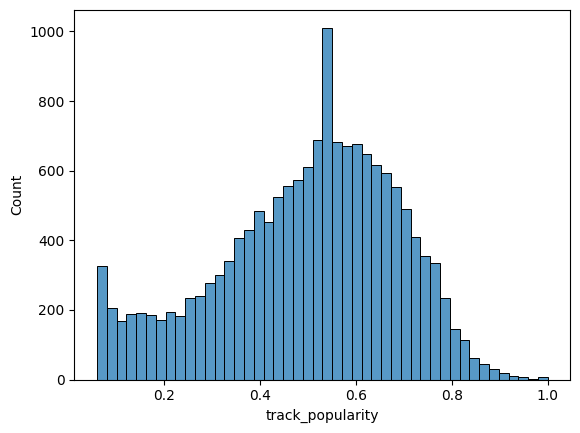

In [10]:
sns.histplot(dfnum.loc[:,'track_popularity'])

In [11]:
# Separa features y targest
targets = dfnum.pop('track_popularity')
targets = np.array(targets, dtype = 'float64')
targets.reshape((targets.shape[0],1))
#
features = np.array(dfnum,dtype = 'float64' )
#
print("tamaño de los targets: ",targets.shape)
print("tamaño de los features: ",features.shape)
print(targets)

tamaño de los targets:  (15640,)
tamaño de los features:  (15640, 19)
[0.41 0.28 0.41 ... 0.4  0.36 0.61]


array([-1,  8,  9, ...,  9,  9, -1])

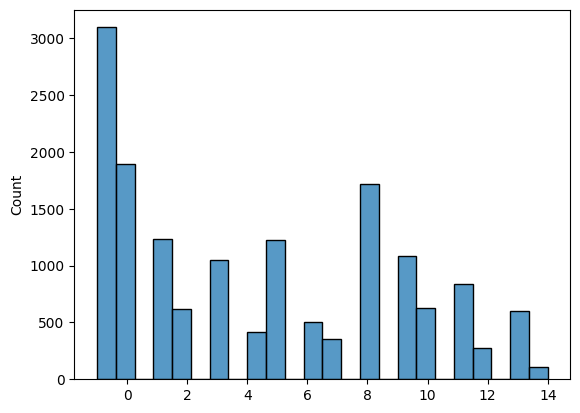

In [12]:
#Let's see if we can sepate the data into
#clusters in order to apply the model separately:
dbscan = cluster.DBSCAN(min_samples=100)
dbscan.fit(features)
sns.histplot(dbscan.labels_)
dbscan.labels_

It seems that clustering didn't work (meaning that there is no clear way to separate it in groups with similar features). Therefore, we are going to model it all together.

Shape of training samples: (12512, 19)
Shape of validation samples: (3128, 19)
[0.23623753 0.18732462 0.16783144 0.15981959 0.10957926 0.06521964]
0.9260120863101031


<AxesSubplot: ylabel='Count'>

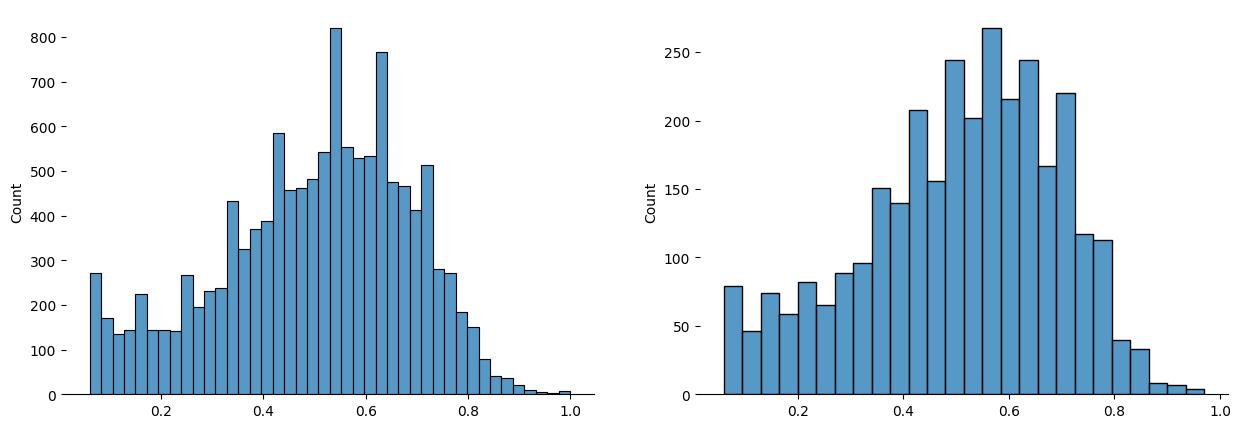

In [24]:
num_val_samples = int(len(features) * 0.2)
train_features, val_features, train_targets, val_targets = train_test_split(features, targets, test_size=num_val_samples, shuffle=True)

print("Shape of training samples:", np.shape(train_features))
print("Shape of validation samples:", np.shape(val_features))
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
# fig.suptitle('Initial Pokemon - 1st Generation')
sns.despine(left=True)
sns.histplot(ax=axes[0],x=train_targets)
sns.histplot(ax=axes[1],x=val_targets)

# Building our predicition model

Now that our data is clear and understood, we are ready for the good part! Builing our Maching Leaning models. We are going to try two approaches: Neural Networks and Reggresion Random Forests.

In [14]:
class CustomModel(Model): #the NN approach
    
    def __init__(self, **kwargs):
        super(CustomModel, self).__init__(**kwargs)
        self.dense1   = Dense(32, activation='leaky_relu')
        self.dropout1 = Dropout(.2, input_shape=(32,))
        self.dense2   = Dense(256, activation='leaky_relu') #si 56: 64,32,8,1
        self.dropout2 = Dropout(.2, input_shape=(256,)) 
        self.dense3   = Dense(512, activation='leaky_relu')
        self.dropout3 = Dropout(.2,input_shape=(512,))
        self.dense4   = Dense(256, activation='leaky_relu')
        self.dropout4 = Dropout(.2, input_shape=(256,))
        self.dense5   = Dense(128, activation='leaky_relu')
        self.dropout5 = Dropout(.2, input_shape=(128,))
        self.dense6   = Dense(16, activation='leaky_relu')
        self.dropout6 = Dropout(.2, input_shape=(16,))
        self.dense7   = Dense(8, activation='leaky_relu')
        self.dropout7 = Dropout(.2, input_shape=(8,))
        self.dense8   = Dense(1, activation='sigmoid')
        
    def call(self, inputs):                    
        x = self.dense1(inputs)                
        x = self.dropout1(x)                   
        x = self.dense2(x)
        x = self.dropout2(x)
        x = self.dense3(x)
        x = self.dropout3(x)
        x = self.dense4(x)
        x = self.dropout4(x)
        x = self.dense5(x)
        x = self.dropout5(x)
        x = self.dense6(x)
        x = self.dropout6(x)
        x = self.dense7(x)
        x = self.dropout7(x)
        return self.dense8(x)

In [15]:
model_spotify = CustomModel(name='my_custom_model')
model_spotify.compile(optimizer=Adam(5e-5),
              loss='mse',
              metrics=["mae"])

2022-11-26 17:37:57.982027: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-26 17:37:57.982087: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-26 17:37:57.982137: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Main_laptop): /proc/driver/nvidia/version does not exist
2022-11-26 17:37:57.982654: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
class Callback(tf.keras.callbacks.Callback):
    SHOW_NUMBER = 50
    counter = 0
    epoch = 0

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch = epoch

    def on_train_batch_end(self, batch, logs=None):
        if self.counter == self.SHOW_NUMBER or self.epoch == 1:
            print('Epoch: ' + str(self.epoch) + ' loss: ' + str(logs['loss']))
            if self.epoch > 1:
                self.counter = 0
        self.counter += 1

In [17]:
history = model_spotify.fit(
    train_features,
    train_targets,
    batch_size=200,
    epochs=1000,
    verbose=0,
    validation_data=(val_features, val_targets),
)

Epoch 1/1000
63/63 [==============================] - 2s 17ms/step - loss: 0.0352 - mae: 0.1522 - val_loss: 0.0350 - val_mae: 0.1515
Epoch 2/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0350 - mae: 0.1520 - val_loss: 0.0350 - val_mae: 0.1515
Epoch 3/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0350 - mae: 0.1520 - val_loss: 0.0348 - val_mae: 0.1512
Epoch 4/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0349 - mae: 0.1518 - val_loss: 0.0347 - val_mae: 0.1509
Epoch 5/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0347 - mae: 0.1515 - val_loss: 0.0346 - val_mae: 0.1504
Epoch 6/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0345 - mae: 0.1507 - val_loss: 0.0341 - val_mae: 0.1493
Epoch 7/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0345 - mae: 0.1507 - val_loss: 0.0340 - val_mae: 0.1491
Epoch 8/1000
63/63 [==============================] - 1s 12ms/step - 

63/63 [==============================] - 1s 12ms/step - loss: 0.0327 - mae: 0.1456 - val_loss: 0.0327 - val_mae: 0.1449
Epoch 124/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0327 - mae: 0.1457 - val_loss: 0.0326 - val_mae: 0.1443
Epoch 125/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0325 - mae: 0.1450 - val_loss: 0.0326 - val_mae: 0.1442
Epoch 126/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0327 - mae: 0.1457 - val_loss: 0.0326 - val_mae: 0.1443
Epoch 127/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0326 - mae: 0.1456 - val_loss: 0.0326 - val_mae: 0.1444
Epoch 128/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0327 - mae: 0.1458 - val_loss: 0.0326 - val_mae: 0.1442
Epoch 129/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0328 - mae: 0.1460 - val_loss: 0.0326 - val_mae: 0.1445
Epoch 130/1000
63/63 [==============================] - 1s 12ms/step -

Epoch 184/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0324 - mae: 0.1449 - val_loss: 0.0325 - val_mae: 0.1439
Epoch 185/1000
63/63 [==============================] - 1s 15ms/step - loss: 0.0323 - mae: 0.1445 - val_loss: 0.0324 - val_mae: 0.1436
Epoch 186/1000
63/63 [==============================] - 1s 15ms/step - loss: 0.0324 - mae: 0.1448 - val_loss: 0.0324 - val_mae: 0.1440
Epoch 187/1000
63/63 [==============================] - 1s 15ms/step - loss: 0.0325 - mae: 0.1449 - val_loss: 0.0324 - val_mae: 0.1441
Epoch 188/1000
63/63 [==============================] - 1s 15ms/step - loss: 0.0325 - mae: 0.1450 - val_loss: 0.0325 - val_mae: 0.1442
Epoch 189/1000
63/63 [==============================] - 1s 15ms/step - loss: 0.0322 - mae: 0.1444 - val_loss: 0.0325 - val_mae: 0.1444
Epoch 190/1000
63/63 [==============================] - 1s 15ms/step - loss: 0.0324 - mae: 0.1447 - val_loss: 0.0324 - val_mae: 0.1437
Epoch 191/1000
63/63 [==============================] -

Epoch 245/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0321 - mae: 0.1442 - val_loss: 0.0323 - val_mae: 0.1437
Epoch 246/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0322 - mae: 0.1442 - val_loss: 0.0323 - val_mae: 0.1437
Epoch 247/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0321 - mae: 0.1439 - val_loss: 0.0323 - val_mae: 0.1435
Epoch 248/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0321 - mae: 0.1440 - val_loss: 0.0324 - val_mae: 0.1437
Epoch 249/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0323 - mae: 0.1445 - val_loss: 0.0324 - val_mae: 0.1437
Epoch 250/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0320 - mae: 0.1436 - val_loss: 0.0323 - val_mae: 0.1432
Epoch 251/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0321 - mae: 0.1437 - val_loss: 0.0323 - val_mae: 0.1436
Epoch 252/1000
63/63 [==============================] -

Epoch 306/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0319 - mae: 0.1432 - val_loss: 0.0323 - val_mae: 0.1435
Epoch 307/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0318 - mae: 0.1431 - val_loss: 0.0322 - val_mae: 0.1433
Epoch 308/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0319 - mae: 0.1434 - val_loss: 0.0322 - val_mae: 0.1427
Epoch 309/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0319 - mae: 0.1432 - val_loss: 0.0322 - val_mae: 0.1433
Epoch 310/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0316 - mae: 0.1426 - val_loss: 0.0322 - val_mae: 0.1432
Epoch 311/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0319 - mae: 0.1436 - val_loss: 0.0322 - val_mae: 0.1435
Epoch 312/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0319 - mae: 0.1432 - val_loss: 0.0322 - val_mae: 0.1434
Epoch 313/1000
63/63 [==============================] -

Epoch 367/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0315 - mae: 0.1426 - val_loss: 0.0322 - val_mae: 0.1437
Epoch 368/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0316 - mae: 0.1424 - val_loss: 0.0322 - val_mae: 0.1432
Epoch 369/1000
63/63 [==============================] - 1s 14ms/step - loss: 0.0317 - mae: 0.1426 - val_loss: 0.0322 - val_mae: 0.1430
Epoch 370/1000
63/63 [==============================] - 1s 15ms/step - loss: 0.0315 - mae: 0.1424 - val_loss: 0.0322 - val_mae: 0.1427
Epoch 371/1000
63/63 [==============================] - 1s 15ms/step - loss: 0.0317 - mae: 0.1425 - val_loss: 0.0322 - val_mae: 0.1438
Epoch 372/1000
63/63 [==============================] - 1s 15ms/step - loss: 0.0315 - mae: 0.1425 - val_loss: 0.0322 - val_mae: 0.1433
Epoch 373/1000
63/63 [==============================] - 1s 14ms/step - loss: 0.0314 - mae: 0.1423 - val_loss: 0.0322 - val_mae: 0.1429
Epoch 374/1000
63/63 [==============================] -

Epoch 428/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0313 - mae: 0.1417 - val_loss: 0.0322 - val_mae: 0.1430
Epoch 429/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0314 - mae: 0.1421 - val_loss: 0.0322 - val_mae: 0.1430
Epoch 430/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0312 - mae: 0.1416 - val_loss: 0.0321 - val_mae: 0.1427
Epoch 431/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0314 - mae: 0.1420 - val_loss: 0.0322 - val_mae: 0.1428
Epoch 432/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0313 - mae: 0.1418 - val_loss: 0.0322 - val_mae: 0.1431
Epoch 433/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0315 - mae: 0.1423 - val_loss: 0.0323 - val_mae: 0.1442
Epoch 434/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0311 - mae: 0.1419 - val_loss: 0.0323 - val_mae: 0.1433
Epoch 435/1000
63/63 [==============================] -

Epoch 489/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0312 - mae: 0.1413 - val_loss: 0.0322 - val_mae: 0.1431
Epoch 490/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0310 - mae: 0.1409 - val_loss: 0.0321 - val_mae: 0.1428
Epoch 491/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0312 - mae: 0.1417 - val_loss: 0.0323 - val_mae: 0.1433
Epoch 492/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0312 - mae: 0.1415 - val_loss: 0.0322 - val_mae: 0.1432
Epoch 493/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0311 - mae: 0.1411 - val_loss: 0.0322 - val_mae: 0.1427
Epoch 494/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0310 - mae: 0.1409 - val_loss: 0.0322 - val_mae: 0.1432
Epoch 495/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0310 - mae: 0.1414 - val_loss: 0.0322 - val_mae: 0.1429
Epoch 496/1000
63/63 [==============================] -

Epoch 550/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0310 - mae: 0.1409 - val_loss: 0.0323 - val_mae: 0.1431
Epoch 551/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0312 - mae: 0.1413 - val_loss: 0.0322 - val_mae: 0.1429
Epoch 552/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0308 - mae: 0.1407 - val_loss: 0.0322 - val_mae: 0.1431
Epoch 553/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0311 - mae: 0.1413 - val_loss: 0.0322 - val_mae: 0.1429
Epoch 554/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0308 - mae: 0.1405 - val_loss: 0.0322 - val_mae: 0.1431
Epoch 555/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0309 - mae: 0.1404 - val_loss: 0.0323 - val_mae: 0.1431
Epoch 556/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0310 - mae: 0.1413 - val_loss: 0.0322 - val_mae: 0.1432
Epoch 557/1000
63/63 [==============================] -

Epoch 611/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0309 - mae: 0.1406 - val_loss: 0.0322 - val_mae: 0.1425
Epoch 612/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0307 - mae: 0.1400 - val_loss: 0.0323 - val_mae: 0.1432
Epoch 613/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0309 - mae: 0.1406 - val_loss: 0.0323 - val_mae: 0.1436
Epoch 614/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0308 - mae: 0.1405 - val_loss: 0.0322 - val_mae: 0.1429
Epoch 615/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0307 - mae: 0.1401 - val_loss: 0.0323 - val_mae: 0.1433
Epoch 616/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0308 - mae: 0.1401 - val_loss: 0.0323 - val_mae: 0.1430
Epoch 617/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0307 - mae: 0.1402 - val_loss: 0.0323 - val_mae: 0.1435
Epoch 618/1000
63/63 [==============================] -

Epoch 672/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0306 - mae: 0.1398 - val_loss: 0.0323 - val_mae: 0.1436
Epoch 673/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0305 - mae: 0.1396 - val_loss: 0.0323 - val_mae: 0.1431
Epoch 674/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0305 - mae: 0.1393 - val_loss: 0.0323 - val_mae: 0.1433
Epoch 675/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0307 - mae: 0.1397 - val_loss: 0.0324 - val_mae: 0.1435
Epoch 676/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0307 - mae: 0.1400 - val_loss: 0.0323 - val_mae: 0.1431
Epoch 677/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0307 - mae: 0.1403 - val_loss: 0.0323 - val_mae: 0.1434
Epoch 678/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0307 - mae: 0.1401 - val_loss: 0.0323 - val_mae: 0.1434
Epoch 679/1000
63/63 [==============================] -

Epoch 733/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0303 - mae: 0.1390 - val_loss: 0.0324 - val_mae: 0.1438
Epoch 734/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0305 - mae: 0.1398 - val_loss: 0.0323 - val_mae: 0.1431
Epoch 735/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0303 - mae: 0.1389 - val_loss: 0.0323 - val_mae: 0.1435
Epoch 736/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0304 - mae: 0.1393 - val_loss: 0.0323 - val_mae: 0.1430
Epoch 737/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0304 - mae: 0.1389 - val_loss: 0.0323 - val_mae: 0.1437
Epoch 738/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0305 - mae: 0.1395 - val_loss: 0.0324 - val_mae: 0.1434
Epoch 739/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0305 - mae: 0.1395 - val_loss: 0.0322 - val_mae: 0.1431
Epoch 740/1000
63/63 [==============================] -

Epoch 794/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0302 - mae: 0.1385 - val_loss: 0.0323 - val_mae: 0.1427
Epoch 795/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0302 - mae: 0.1387 - val_loss: 0.0323 - val_mae: 0.1431
Epoch 796/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0304 - mae: 0.1393 - val_loss: 0.0323 - val_mae: 0.1431
Epoch 797/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0302 - mae: 0.1386 - val_loss: 0.0324 - val_mae: 0.1437
Epoch 798/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0303 - mae: 0.1390 - val_loss: 0.0323 - val_mae: 0.1432
Epoch 799/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0301 - mae: 0.1387 - val_loss: 0.0323 - val_mae: 0.1428
Epoch 800/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0302 - mae: 0.1385 - val_loss: 0.0324 - val_mae: 0.1434
Epoch 801/1000
63/63 [==============================] -

Epoch 855/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0302 - mae: 0.1386 - val_loss: 0.0326 - val_mae: 0.1445
Epoch 856/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0300 - mae: 0.1383 - val_loss: 0.0324 - val_mae: 0.1431
Epoch 857/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0303 - mae: 0.1388 - val_loss: 0.0324 - val_mae: 0.1433
Epoch 858/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0306 - mae: 0.1395 - val_loss: 0.0324 - val_mae: 0.1430
Epoch 859/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0301 - mae: 0.1386 - val_loss: 0.0324 - val_mae: 0.1437
Epoch 860/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0300 - mae: 0.1386 - val_loss: 0.0323 - val_mae: 0.1432
Epoch 861/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0301 - mae: 0.1383 - val_loss: 0.0325 - val_mae: 0.1435
Epoch 862/1000
63/63 [==============================] -

Epoch 916/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0302 - mae: 0.1386 - val_loss: 0.0324 - val_mae: 0.1432
Epoch 917/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0302 - mae: 0.1387 - val_loss: 0.0324 - val_mae: 0.1435
Epoch 918/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0299 - mae: 0.1380 - val_loss: 0.0324 - val_mae: 0.1432
Epoch 919/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0299 - mae: 0.1379 - val_loss: 0.0324 - val_mae: 0.1435
Epoch 920/1000
63/63 [==============================] - 1s 13ms/step - loss: 0.0298 - mae: 0.1377 - val_loss: 0.0326 - val_mae: 0.1442
Epoch 921/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0301 - mae: 0.1384 - val_loss: 0.0325 - val_mae: 0.1441
Epoch 922/1000
63/63 [==============================] - 1s 14ms/step - loss: 0.0301 - mae: 0.1385 - val_loss: 0.0324 - val_mae: 0.1437
Epoch 923/1000
63/63 [==============================] -

Epoch 977/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0300 - mae: 0.1384 - val_loss: 0.0326 - val_mae: 0.1441
Epoch 978/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0299 - mae: 0.1378 - val_loss: 0.0326 - val_mae: 0.1441
Epoch 979/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0300 - mae: 0.1380 - val_loss: 0.0325 - val_mae: 0.1437
Epoch 980/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0299 - mae: 0.1381 - val_loss: 0.0326 - val_mae: 0.1439
Epoch 981/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0298 - mae: 0.1375 - val_loss: 0.0326 - val_mae: 0.1440
Epoch 982/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0299 - mae: 0.1378 - val_loss: 0.0324 - val_mae: 0.1433
Epoch 983/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.0300 - mae: 0.1379 - val_loss: 0.0325 - val_mae: 0.1433
Epoch 984/1000
63/63 [==============================] -

In [18]:
score = model_spotify.evaluate(val_features, val_targets)
print(score)
model_spotify.metrics_names

98/98 [==============================] - 0s 3ms/step - loss: 0.0325 - mae: 0.1434
[0.03248249366879463, 0.14339430630207062]


['loss', 'mae']

98/98 [==============================] - 0s 3ms/step


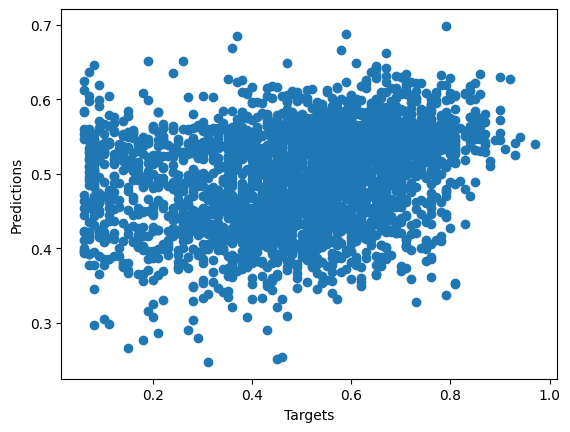

[[1.         0.28143259]
 [0.28143259 1.        ]]


In [19]:
y_prediction = model_spotify.predict(val_features)
y_prediction = np.squeeze(y_prediction)
g = plt.figure()
plt.scatter(val_targets, y_prediction)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.show()
g.savefig('correlacionerroresNN.eps', format='eps', dpi=1000)
my_rho = np.corrcoef(val_targets, y_prediction)
print(my_rho)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


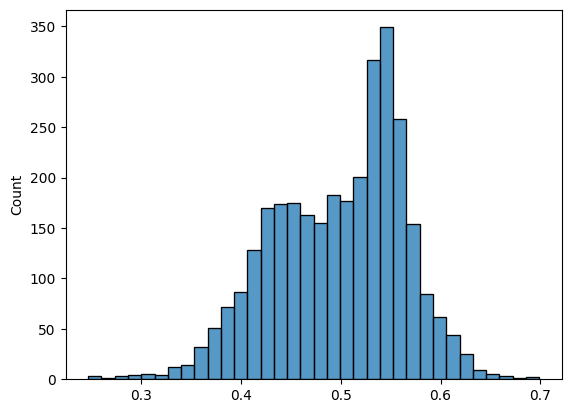

In [20]:
g = sns.histplot(y_prediction)
fig = g.get_figure()
fig.savefig("cuentacancionesNN.eps", format='eps', dpi=1000) 

We can see that the results are not quite good. The corelation coefficient is too low and the distribution of the predicted values does not match the targets. Let's try the other approach and see if this situation gets better.

In [21]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0,max_depth=1000, verbose=0)
  
# fit the regressor with x and y data
regressor.fit(train_features, train_targets)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

building tree 323 of 1000
building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tre

building tree 641 of 1000
building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tre

building tree 957 of 1000
building tree 958 of 1000
building tree 959 of 1000
building tree 960 of 1000
building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


RandomForestRegressor(max_depth=1000, n_estimators=1000, random_state=0,
                      verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.6s finished


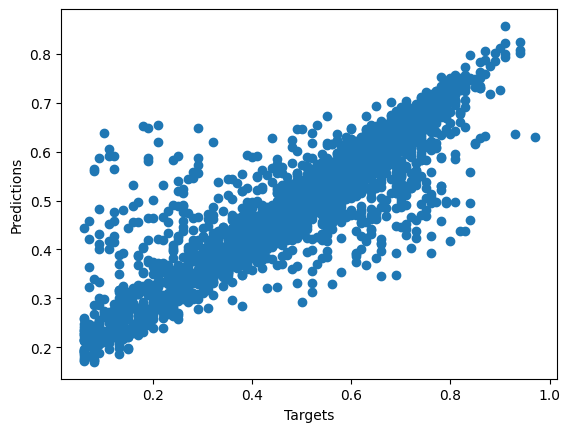

[[1.         0.88614928]
 [0.88614928 1.        ]]
Error during validation:  0.009279696974221955


In [25]:
y_prediction = regressor.predict(val_features)
y_prediction = np.squeeze(y_prediction)
r = plt.figure()
plt.scatter(val_targets, y_prediction)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.show()
r.savefig('correlacionerroresRF.eps', format='eps', dpi=1000)
my_rho = np.corrcoef(val_targets, y_prediction)
print(my_rho)
err = (np.linalg.norm(y_prediction-val_targets))**2/len(y_prediction)
print('Error during validation: ',err)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


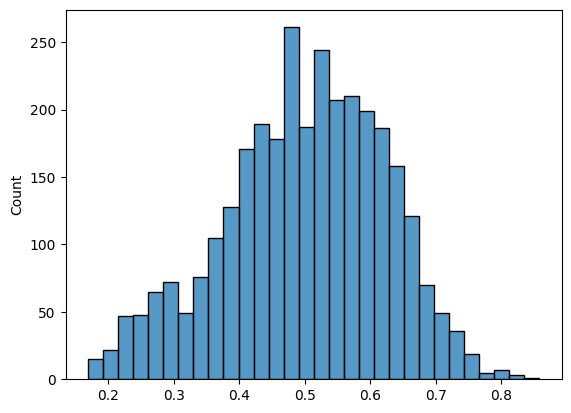

In [26]:
h = sns.histplot(y_prediction)
fig = h.get_figure()
fig.savefig("cuentacancionesRF.eps", format='eps', dpi=1000) 

We can see that, even though the results are not what we expected, there is an important improvement compared with the first approach (better corelation and distribution). Nevertheless, there is a lot of room for more improvement. Notably, we can work with the fact that both models failed to predict the deviation of the data, targeting excessively the mean values. We could fix this problem by over-sampling the songs that are closer to the extreme values 0 and 100 and see if this helps our models.